# Lending Club Case Study - Exploratory Data Analysis


### Group Members ###
* **Anurag Bombarde**
* **Ameet Topare**

### Business Understanding ###
When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. 

Two types of risks are associated with the bank’s decision:

* If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

* If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

When a person applies for a loan, there are two types of decisions that could be taken by the company:

* Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:

    * Fully paid: Applicant has fully paid the loan (the principal and the interest rate)

    * Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

    * Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

* Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

### Business Objective ###

The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.

## Reading Loan CSV and analysing columns


In [415]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [416]:
loan_df = pd.read_csv('/Users/anurag/Desktop/Lending_Club_Case_Study/loan.csv',low_memory=False)


In [417]:
loan_df.shape

(39717, 111)

In [418]:
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [419]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [420]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# Data Cleaning

In [421]:
# Finding the missing values
missing_data =  round(loan_df.isnull().sum() * 100 / len(loan_df),2)
missing_data.loc[missing_data > 0]

emp_title                       6.19
emp_length                      2.71
desc                           32.58
title                           0.03
mths_since_last_delinq         64.66
                               ...  
tax_liens                       0.10
tot_hi_cred_lim               100.00
total_bal_ex_mort             100.00
total_bc_limit                100.00
total_il_high_credit_limit    100.00
Length: 68, dtype: float64

**Some of the columns are having 100% missing data , lets get rid of this data**

In [422]:
missing_value_columns = list(missing_data[missing_data == 100].index)

missing_value_columns

['mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_lim',
 'total_bal

In [423]:
len(missing_value_columns)

54

**As 100% data is missing in above 54 colums , dropping it**


In [424]:
#As 100% data is missing in above 54 colums , dropping it
loan_df = loan_df.drop(missing_value_columns,axis=1)
loan_df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


* **dropping below columns based on high percentage missing data**
* **desc (Loan description provided by the borrower )= 32.58% missing data**
* **mths_since_last_delinq =64.66% missing data**
* **mths_since_last_record = 93% missing data**
* **next_pymnt_d = 97% missing data**



In [425]:
loan_df = loan_df.drop(['desc','next_pymnt_d','mths_since_last_record', 'mths_since_last_delinq'], axis=1)

In [426]:
loan_df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


***We need to decide on below columns**
- **emp_title                     - The job title supplied by the Borrower when applying for the loan. -  Has 6.19%                                        missing values**
- **emp_length                    - Employment length in years. Possible values are between 0 and 10 where 0 means                                         less than one year and - means ten or more years. - Has 2.71%  missing value**
- **title                         - The loan title provided by the borrower - has 0.03% missing values**
- **revol_util                    - Revolving line utilization rate, or the amount of credit the borrower is using                                        relative to all available revolving credit. - Has 0.13% missing values**
- **last_pymnt_d                  - Last month payment was received - Has 0.18% missing values**
- **last_credit_pull_d            - 0.01% missing values**
- **collections_12_mths_ex_med    - Number of collections in 12 months excluding medical collections - has 0.14%                                           missing values**
- **chargeoff_within_12_mths      - Number of charge-offs within 12 months (When an account displays a status of                                           "charge off," it means the account is closed to future use) - Has 0.14% missign                                       values**
- **pub_rec_bankruptcies          - Number of public record bankruptcies - Has 1.75% missing values**
- **tax_liens-Number of tax liens -(tax lien is the government's legal claim against your property when you neglect or                                    fail to pay a tax debt) - 0.10% missing values**

#### Looking at the CSV and the description given these columns can be dropped - emp_title , title , collection within 12 months excluding med , chargeoff_within_12_mths , taxlien - has most of the data as zero ####


In [427]:
loan_df = loan_df.drop(['emp_title','title','collections_12_mths_ex_med', 'chargeoff_within_12_mths','tax_liens'], axis=1)

In [428]:
round(loan_df.isnull().sum() * 100 / len(loan_df),2)

id                         0.00
member_id                  0.00
loan_amnt                  0.00
funded_amnt                0.00
funded_amnt_inv            0.00
term                       0.00
int_rate                   0.00
installment                0.00
grade                      0.00
sub_grade                  0.00
emp_length                 2.71
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
issue_d                    0.00
loan_status                0.00
pymnt_plan                 0.00
url                        0.00
purpose                    0.00
zip_code                   0.00
addr_state                 0.00
dti                        0.00
delinq_2yrs                0.00
earliest_cr_line           0.00
inq_last_6mths             0.00
open_acc                   0.00
pub_rec                    0.00
revol_bal                  0.00
revol_util                 0.13
total_acc                  0.00
initial_list_status        0.00
out_prnc

**Now Most of the data is clean however we need to check if any column is metadata column and can be dropped
So below are the columns which can be dropped further**
- id
- member_id
- url
- zip_code
- policy_code


In [429]:
loan_df = loan_df.drop(['id','member_id','url', 'zip_code','policy_code'], axis=1)

In [430]:
loan_df.shape

(39717, 43)

**Lets drop duplicates now**


In [431]:
loan_df = loan_df.drop_duplicates()

In [432]:
loan_df.shape

(39717, 43)

In [433]:
# removing null values of emp_length , revol_util , last_pymnt_d as it has very insiginficant % of missing data
loan_df=loan_df[~loan_df.emp_length.isnull()]
loan_df=loan_df[~loan_df.revol_util.isnull()]
loan_df=loan_df[~loan_df.last_pymnt_d.isnull()]

In [434]:
round(loan_df.isnull().sum() * 100 / len(loan_df),2)

loan_amnt                  0.00
funded_amnt                0.00
funded_amnt_inv            0.00
term                       0.00
int_rate                   0.00
installment                0.00
grade                      0.00
sub_grade                  0.00
emp_length                 0.00
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
issue_d                    0.00
loan_status                0.00
pymnt_plan                 0.00
purpose                    0.00
addr_state                 0.00
dti                        0.00
delinq_2yrs                0.00
earliest_cr_line           0.00
inq_last_6mths             0.00
open_acc                   0.00
pub_rec                    0.00
revol_bal                  0.00
revol_util                 0.00
total_acc                  0.00
initial_list_status        0.00
out_prncp                  0.00
out_prncp_inv              0.00
total_pymnt                0.00
total_pymnt_inv            0.00
total_re

Lets check the datatype of each column

**Looks like acc_now_delinq and delinq_amnt columns have lets confirm and if yes lest drop them as well**

In [435]:
print((loan_df['acc_now_delinq'] == 0).all())
print((loan_df['delinq_amnt'] == 0).all())

True
True


**Good to drop both the above columns**

In [436]:
loan_df = loan_df.drop(['acc_now_delinq','delinq_amnt'], axis=1)

In [437]:
loan_df.shape

(38533, 41)

**pub_rec_bankruptcies column has 1.81 % missing data , lets find out the values**

In [438]:
loan_df['pub_rec_bankruptcies'].value_counts()

0.0    36273
1.0     1556
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

**As per the Data_Dictionary.xls meaning of  pub_rec_bankruptcies means is Number of public record bankruptcies. Putting Mode of it**

In [439]:
loan_df['pub_rec_bankruptcies'].fillna(loan_df['pub_rec_bankruptcies'].mode()[0], inplace=True)


**removnig null values of last_credit_pull_d**

In [440]:
loan_df=loan_df[~loan_df.last_credit_pull_d.isnull()]


In [441]:
round(loan_df.isnull().sum() * 100 / len(loan_df),2)

loan_amnt                  0.0
funded_amnt                0.0
funded_amnt_inv            0.0
term                       0.0
int_rate                   0.0
installment                0.0
grade                      0.0
sub_grade                  0.0
emp_length                 0.0
home_ownership             0.0
annual_inc                 0.0
verification_status        0.0
issue_d                    0.0
loan_status                0.0
pymnt_plan                 0.0
purpose                    0.0
addr_state                 0.0
dti                        0.0
delinq_2yrs                0.0
earliest_cr_line           0.0
inq_last_6mths             0.0
open_acc                   0.0
pub_rec                    0.0
revol_bal                  0.0
revol_util                 0.0
total_acc                  0.0
initial_list_status        0.0
out_prncp                  0.0
out_prncp_inv              0.0
total_pymnt                0.0
total_pymnt_inv            0.0
total_rec_prncp            0.0
total_re

In [442]:
   loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,INDIVIDUAL,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,INDIVIDUAL,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,INDIVIDUAL,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,INDIVIDUAL,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,INDIVIDUAL,0.0


In [443]:
loan_df.shape

(38531, 41)


**Lets clean int_rate and term by removing extra '%' and 'months' string**

In [444]:
loan_df['int_rate'] = loan_df['int_rate'].str.replace(r'%', '')

loan_df['term'] = loan_df['term'].str.replace(r'months', '')


In [445]:
loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,pub_rec_bankruptcies
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,INDIVIDUAL,0.0
1,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,INDIVIDUAL,0.0
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,INDIVIDUAL,0.0
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,INDIVIDUAL,0.0
4,3000,3000,3000.0,60,12.69,67.79,B,B5,1 year,RENT,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,INDIVIDUAL,0.0


In [446]:
loan_df.dtypes
# loan_df.info()

loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
pymnt_plan                  object
purpose                     object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                  object
total_acc                    int64
initial_list_status         object
out_prncp                  float64
out_prncp_inv       

**we need to change the data types of column int_rate and term**

In [447]:
# loan_df['int_rate'] = pd.to_numeric(loan_df['int_rate']) 
loan_df['int_rate'] = loan_df['int_rate'].astype('float64')
loan_df['term'] = loan_df['term'].astype('int64')

In [448]:
loan_df['loan_status'].value_counts()

Fully Paid     32112
Charged Off     5321
Current         1098
Name: loan_status, dtype: int64

In [449]:
loan_df['last_pymnt_d'].value_counts()

May-16    1209
Mar-13     999
Dec-14     910
May-13     884
Feb-13     845
          ... 
Nov-08      10
Jun-08      10
Mar-08       5
Jan-08       4
Feb-08       1
Name: last_pymnt_d, Length: 101, dtype: int64

# After data cleaning below are the columns with the description which we will analyse and filter out for univariate , bivariate analysis

# Univariate Analysis


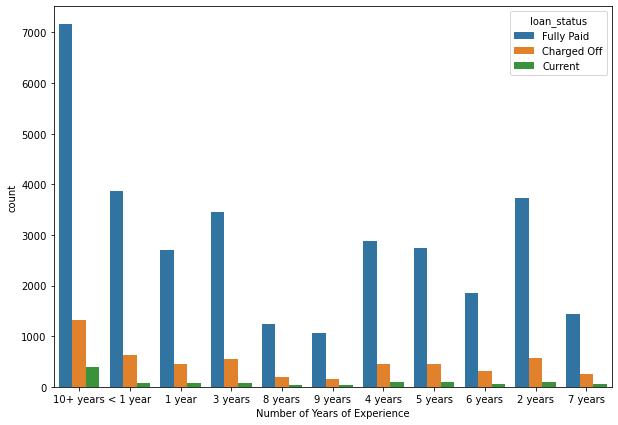

In [450]:
plt.figure(figsize=(10,7))
sns.countplot( x="emp_length", hue='loan_status', data=loan_df)
plt.xlabel('Number of Years of Experience')
plt.show()

**Inference** - Less than 3 yrs experienced people and more than 10 Years are going for loan most frequently.More than 10 yrs exp folks are less likely to become defaulter

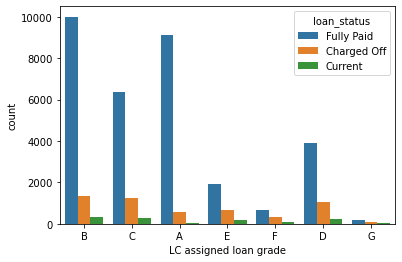

In [451]:
sns.countplot(x='grade', hue='loan_status',data=loan_df)
plt.xlabel('LC assigned loan grade')
plt.show()

**Inference-** Looking at above plot it can be concluded that LC assigned Grades B,C,D are having more numbers of defaulters

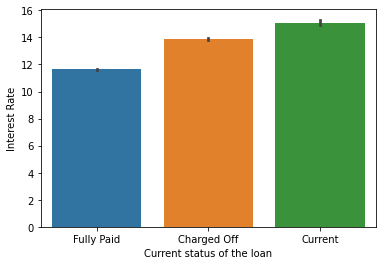

In [452]:
sns.barplot(data=loan_df , x="loan_status" , y='int_rate')
plt.ylabel('Interest Rate')
plt.xlabel('Current status of the loan')
plt.show()

**Inference-** This shows if interest rate is more than 12% then its most likely that number of defaulters will increase


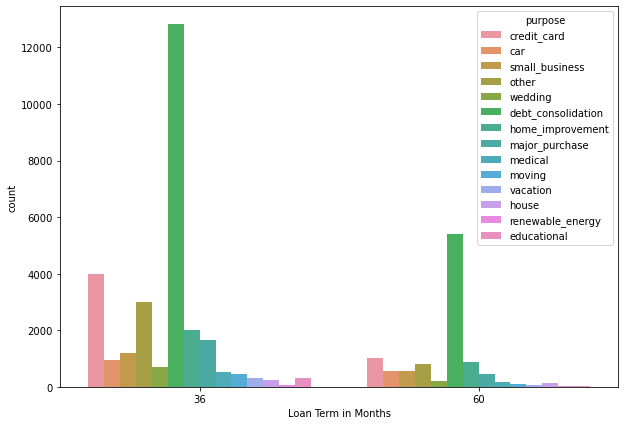

In [453]:

plt.figure(figsize=(10,7))
sns.countplot( x="term", hue='purpose', data=loan_df)
plt.xlabel('Loan Term in Months')
plt.show()

**Inference-** Above graph shows that in both the terms 36 and 60 people are going mainly for debt consolidation purpose for loan**

# Segmented Univariate Analysis

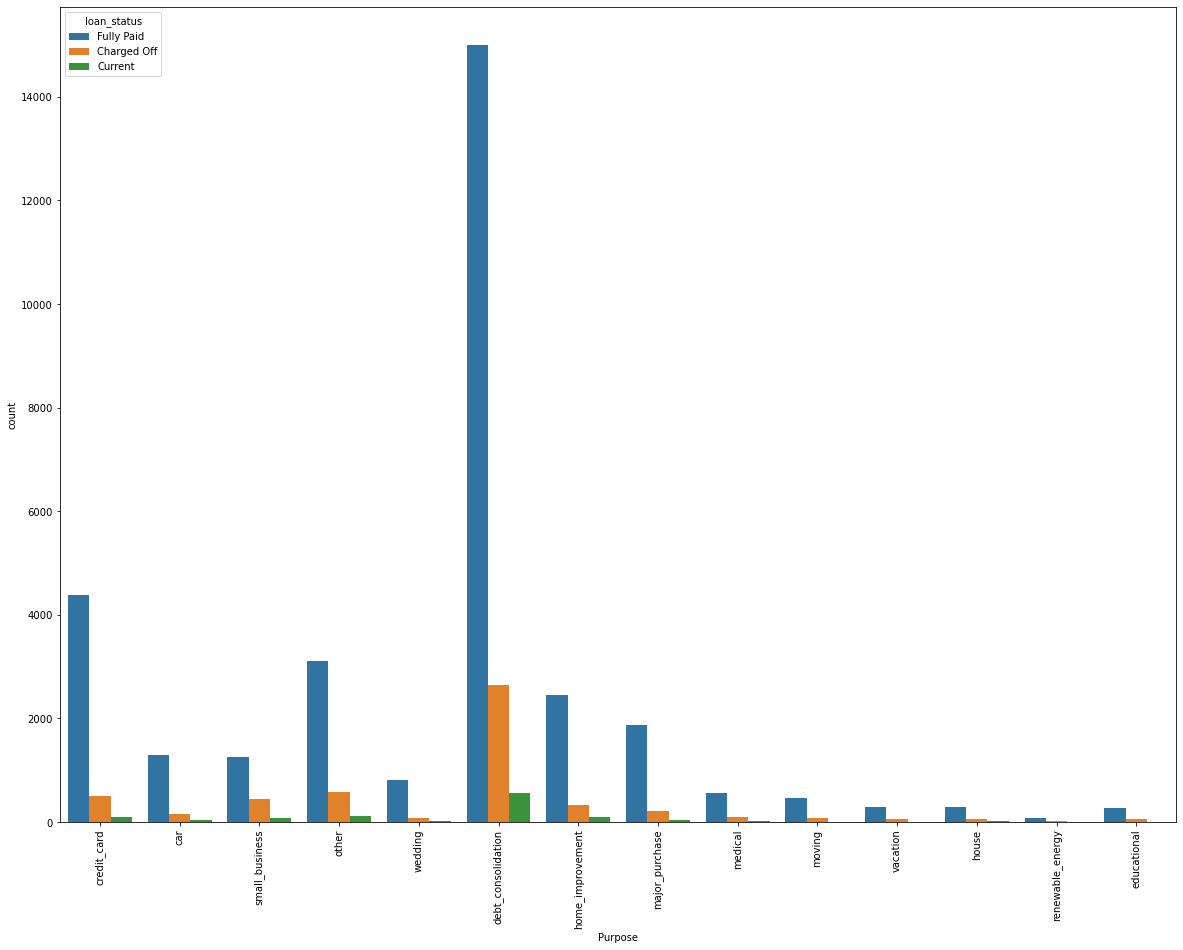

In [454]:
plt.figure(figsize=(20,15))
sns.countplot( x="purpose", hue='loan_status', data=loan_df)
plt.xticks(rotation=90)
plt.xlabel('Purpose')
plt.show()

**Inference-** Debt consolidation purpose loan is given frequently and fully paid as well

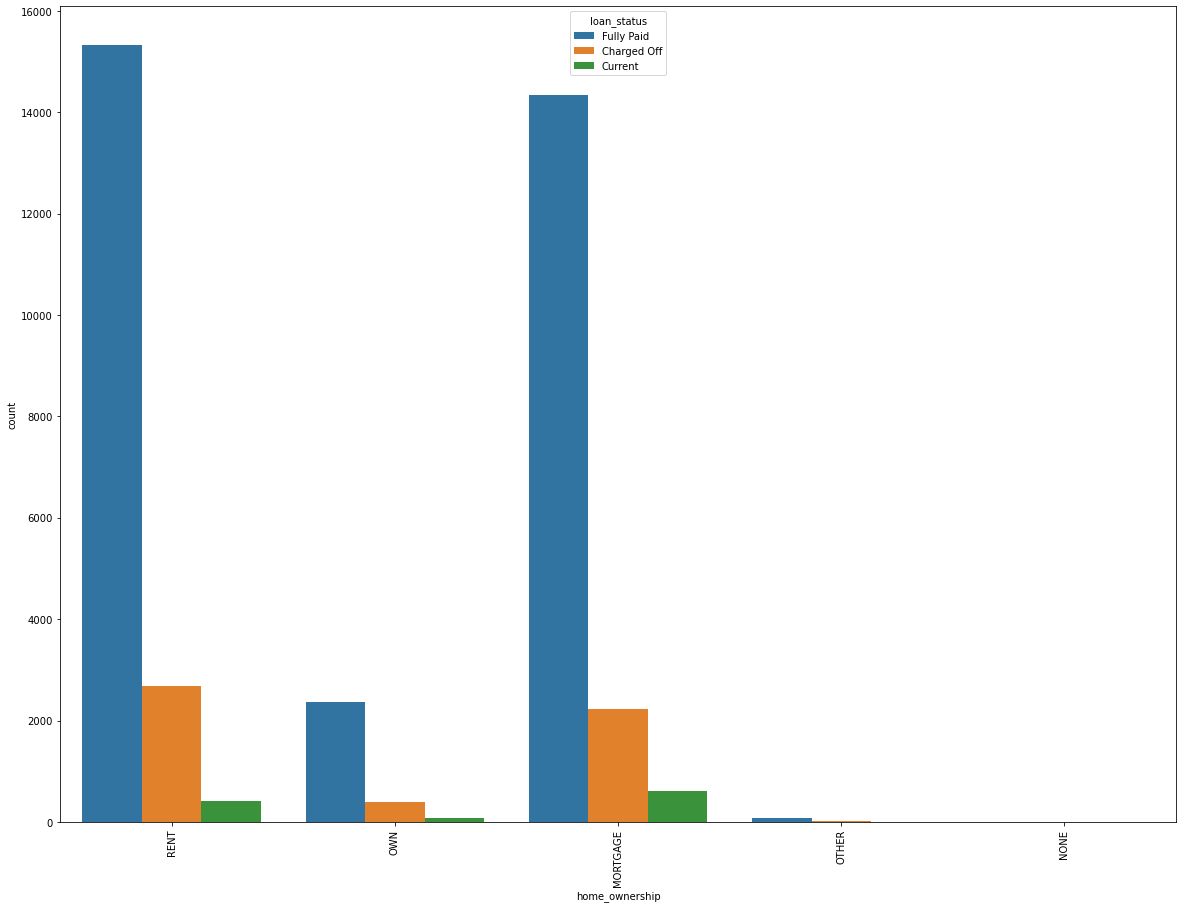

In [455]:
plt.figure(figsize=(20,15))
sns.countplot(x='home_ownership',hue='loan_status', data=loan_df)
plt.xticks(rotation=90)
plt.show()

**Inference-** This shows that home ownership type RENT and MORTGAGE has high frequency of fully paid loan

# Derived Columns

In [456]:
loan_df['issue_d_month'], loan_df['issue_d_year'] = loan_df['issue_d'].str.split('-').str

In [457]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38531 entries, 0 to 39716
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                38531 non-null  int64  
 1   funded_amnt              38531 non-null  int64  
 2   funded_amnt_inv          38531 non-null  float64
 3   term                     38531 non-null  int64  
 4   int_rate                 38531 non-null  float64
 5   installment              38531 non-null  float64
 6   grade                    38531 non-null  object 
 7   sub_grade                38531 non-null  object 
 8   emp_length               38531 non-null  object 
 9   home_ownership           38531 non-null  object 
 10  annual_inc               38531 non-null  float64
 11  verification_status      38531 non-null  object 
 12  issue_d                  38531 non-null  object 
 13  loan_status              38531 non-null  object 
 14  pymnt_plan            

In [458]:
loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,pub_rec_bankruptcies,issue_d_month,issue_d_year
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,...,0.00,0.00,0.00,Jan-15,171.62,May-16,INDIVIDUAL,0.0,Dec,11
1,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,...,0.00,117.08,1.11,Apr-13,119.66,Sep-13,INDIVIDUAL,0.0,Dec,11
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,...,0.00,0.00,0.00,Jun-14,649.91,May-16,INDIVIDUAL,0.0,Dec,11
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,...,16.97,0.00,0.00,Jan-15,357.48,Apr-16,INDIVIDUAL,0.0,Dec,11
4,3000,3000,3000.0,60,12.69,67.79,B,B5,1 year,RENT,...,0.00,0.00,0.00,May-16,67.79,May-16,INDIVIDUAL,0.0,Dec,11


# Bivariate Analysis

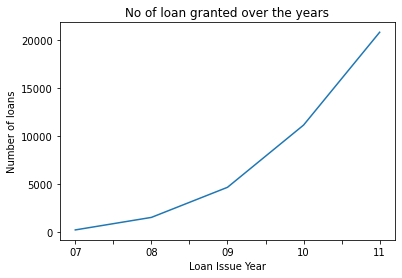

In [459]:
groupedData = loan_df.groupby('issue_d_year')['loan_status'].count()
groupedData.plot.line(x_compat=True)
plt.title('No of loan granted over the years')
plt.xlabel('Loan Issue Year')
plt.ylabel('Number of loans')
plt.show()

**Inference-** within period of  2007 to 2011 loan granted count is also increasing 

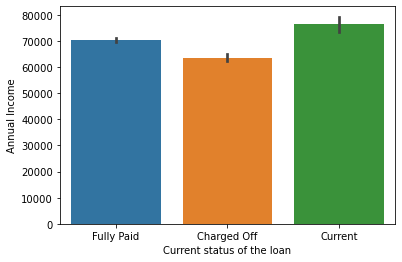

In [460]:

sns.barplot(x='loan_status', y='annual_inc', data=loan_df)
plt.xlabel('Current status of the loan')
plt.ylabel('Annual Income')
plt.show()


**Inference-** This shows bivariate relation that with increasing annual income fully paid frequency is increasing and defaulter rate is decreasing

# Conclusion

## 5 important driver variables 
1. **Employment Length** - More than 10 yrs exp folks are less likely to default 
2. **Grade** - Looking at above plot it can be concluded that employees with Grade B,C,D are having more numbers of defaulters
3. **Interest rate** - This shows if interest rate is more than 12% then its most likely that number of defaulters will increase
4. **Purpose** - Debt consolidation purpose loan is given frequently and fully paid as well
5. **Home Ownership type** - This shows that home ownership type RENT and MORTGAGE has high frquency of fully paid loan

Bivariate Analysis Shows - 
1. From year 2007 to 2011 loan granted count is also increasing 
2. With increasing annual income fully paid frequency is increasing and defaulter rate is decreasing!
